## Importing libraries


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Reading files




In [0]:
data = pd.read_excel('cases_matrix.xlsx', index_col=0, skiprows=[0]) 

data = data.iloc[2:-1,2:-1]
#data = data.drop(data.columns[-1], axis=1) #removing column Total
data.fillna(0, inplace=True)
data = data.reset_index(drop=True)

In [3]:
column_names = []
for i in range(55):
  column_names.append('Z'+str(i+1))

data.columns = column_names
data.columns

Index(['Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'Z10', 'Z11',
       'Z12', 'Z13', 'Z14', 'Z15', 'Z16', 'Z17', 'Z18', 'Z19', 'Z20', 'Z21',
       'Z22', 'Z23', 'Z24', 'Z25', 'Z26', 'Z27', 'Z28', 'Z29', 'Z30', 'Z31',
       'Z32', 'Z33', 'Z34', 'Z35', 'Z36', 'Z37', 'Z38', 'Z39', 'Z40', 'Z41',
       'Z42', 'Z43', 'Z44', 'Z45', 'Z46', 'Z47', 'Z48', 'Z49', 'Z50', 'Z51',
       'Z52', 'Z53', 'Z54', 'Z55'],
      dtype='object')

In [4]:
data.head()

,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10,Z11,Z12,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Z21,Z22,Z23,Z24,Z25,Z26,Z27,Z28,Z29,Z30,Z31,Z32,Z33,Z34,Z35,Z36,Z37,Z38,Z39,Z40,Z41,Z42,Z43,Z44,Z45,Z46,Z47,Z48,Z49,Z50,Z51,Z52,Z53,Z54,Z55
0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##Calculating Transpose Matrix

##Ploting charts

In [5]:
dt = data.astype(float)
dt

,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10,Z11,Z12,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Z21,Z22,Z23,Z24,Z25,Z26,Z27,Z28,Z29,Z30,Z31,Z32,Z33,Z34,Z35,Z36,Z37,Z38,Z39,Z40,Z41,Z42,Z43,Z44,Z45,Z46,Z47,Z48,Z49,Z50,Z51,Z52,Z53,Z54,Z55
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,0.0,3.0,3.0,0.0,0.0,1.0,3.0,1.0,1.0,2.0,0.0,0.0,3.0,2.0,0.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,6.0,0.0,4.0,2.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
328,1.0,3.0,3.0,1.0,0.0,0.0,2.0,1.0,3.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,4.0,5.0,5.0,6.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
329,0.0,2.0,4.0,1.0,0.0,1.0,2.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,2.0,1.0,0.0,3.0,0.0,0.0,2.0,4.0,2.0,2.0,3.0,7.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
330,0.0,1.0,4.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,1.0,0.0,2.0,1.0,1.0,3.0,3.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


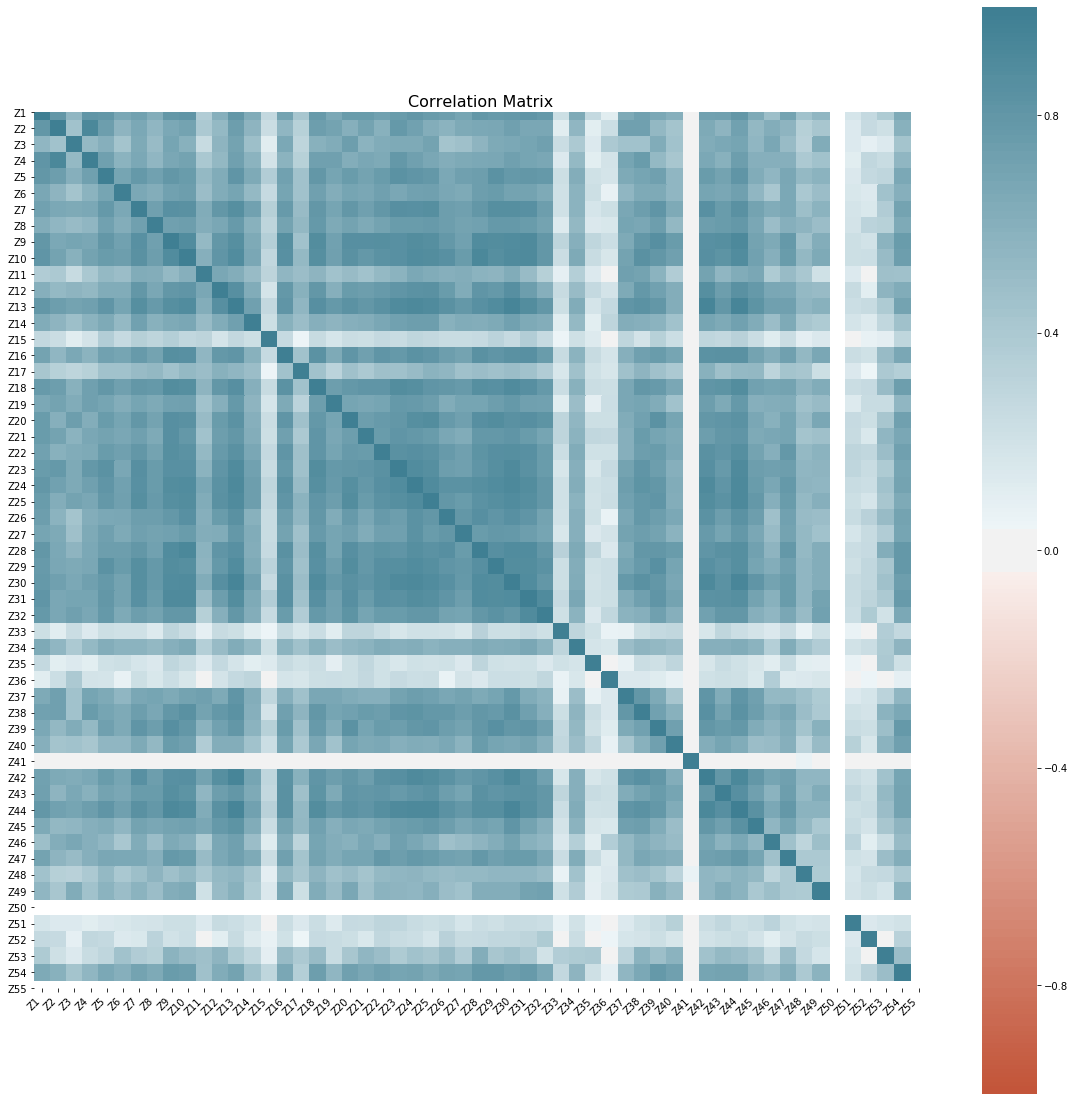

In [6]:
corr = dt.corr(method='pearson')

plt.figure(figsize = (20,20))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=400),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title('Correlation Matrix', fontsize=16);
plt.savefig('correlationPearson.pdf')

In [0]:
export_csv = corr.to_csv('correlations.csv', index = True, header=True)
corr.columns
listas = corr.values.tolist()
lista0 = listas[0]



##Using our function to calculate correlation

In [0]:
def calcCorr(data, position, times):
  count_columns = data.shape[1]
  A = data.iloc[:,position]

  listOfCorrs=[]
  for i in range(0, count_columns):   
      B = data.iloc[:,i]
      count_begin=0
      count_row = data.shape[0]
      count_times = times
      corrs = []
      while count_times>0:
      #while count_row>=count_begin:
        AA = A.iloc[count_begin:] 
        BB = B.iloc[:count_row] 
        AA = AA.reset_index(drop=True)
        BB = BB.reset_index(drop=True)
        count_row = count_row - 1
        count_begin = count_begin +1
        merged = pd.merge_asof(AA, BB, left_index=True, right_index=True, direction='nearest')

        pearsoncorr = merged.corr(method='pearson')
        corrs.append(pearsoncorr.iloc[0,1])
        count_times = count_times - 1

        #print(corrs)
      listOfCorrs.append(corrs)
  return listOfCorrs



def calcCorrBetweenTwoColumns(data, column1, column2, times):
  count_columns = data.shape[1]
  A = data.iloc[:,column1]

  listOfCorrs=[]
  B = data.iloc[:,column2]
  count_begin=0
  count_row = data.shape[0]
  count_times = times
  corrs = []
  while count_times>0:
    AA = A.iloc[count_begin:] 
    BB = B.iloc[:count_row] 
    AA = AA.reset_index(drop=True)
    BB = BB.reset_index(drop=True)
    count_row = count_row - 1
    count_begin = count_begin +1
    merged = pd.merge_asof(AA, BB, left_index=True, right_index=True, direction='nearest')

    pearsoncorr = merged.corr(method='pearson')
    corrs.append(pearsoncorr.iloc[0,1])
    count_times = count_times - 1

  listOfCorrs.append(corrs)
  return listOfCorrs

def transformListInDataframeWithLabels(columnNumber, listOfCorrs, signals):
  labels = []
  resumeOfList = listOfCorrs[0]
  #columnName=transposeData.columns[column]
  
  for i in range(len(resumeOfList)):
    if(signals=="negative"):
      labels.append("k =-"+str(i))
    else:   
      labels.append("k ="+str(i))
  #label = ['k=0', 'k=1', 'k=2', 'k=3', 'k=4', 'k=5']
  listDataFrame = pd.DataFrame(resumeOfList, index=labels)
  listDataFrame.rename(columns = {0:columnNumber}, inplace=True)
 
 
  return listDataFrame

In [9]:
firstColumn = 5
secondColumn = 8


def getCorrsFromASpecificColumn(column, listOfCorrs, signals):
  labels = []
  resumeOfList = listOfCorrs[column]
  columnName=transposeData.columns[column]
  
  for i in range(len(resumeOfList)):
    if(signals=="negative"):
      labels.append("k =-"+str(i))
    else:   
      labels.append("k ="+str(i))
  #label = ['k=0', 'k=1', 'k=2', 'k=3', 'k=4', 'k=5']
  listDataFrame = pd.DataFrame(resumeOfList, index=labels)
  listDataFrame.rename(columns = {0:columnName}, inplace=True)
 
  return listDataFrame
  
times = 24

result = calcCorrBetweenTwoColumns(dt, 5, 8, times)
firstList = transformListInDataframeWithLabels(0, result, "positive")
firstList

result = transformListInDataframeWithLabels(8,calcCorrBetweenTwoColumns(dt, 5, 8, times), "positive")
result2 = transformListInDataframeWithLabels(5,calcCorrBetweenTwoColumns(dt, 8, 5, times), "negative")

result2.rename(index={0: str(secondColumn) +"->"+ str(firstColumn)})
result.rename(index={0: str(secondColumn) +"->"+ str(firstColumn)})

result2.columns = [str(firstColumn)+"-"+str(secondColumn)]

result.columns = [str(firstColumn)+"-"+str(secondColumn)]

result2 = result2[1:]
result2

frames = [result2[::-1], result]
frames
lista58 = pd.concat(frames)
lista58

,5-8
k =-23,-0.083957
k =-22,-0.064297
k =-21,-0.066751
k =-20,-0.015985
k =-19,0.012024
k =-18,0.008916
k =-17,0.056850
k =-16,0.017257
k =-15,0.105273
k =-14,0.067661


In [0]:
correlations =  pd.DataFrame(columns=['X1','X2','corr'])

for x in range(dt.shape[1]):
  #listOfCorrsSecond = calcCorr(dt, x, 1)
    
 # for i in range(x+1, len(listOfCorrsSecond)):
   for i in range(x+1, dt.shape[1]):
    correlations = correlations.append({
     "X1": (x+1),
     "X2":  (i+1),
        "corr": calcCorrBetweenTwoColumns(dt, x, i, 1)[0][0]
      }, ignore_index=True)

correlations
export_csv = correlations.to_csv('x1x2_correlations.csv', index = True, header=True)


In [11]:
dt.shape

(332, 55)

In [0]:
dt.fillna(0, inplace=True)
majorCorrelations =  pd.DataFrame(columns=['X1','X2','corr', 'highest_corr','highest_k'])
times = 12
  
for xs in range(0, dt.shape[1]):
  firstColumn = xs
  for ys in range(firstColumn+1, dt.shape[1]):
    secondColumn = ys

    result = calcCorrBetweenTwoColumns(dt, firstColumn, secondColumn, times)

    firstList = transformListInDataframeWithLabels(0, result, "positive")
    firstList

    result = transformListInDataframeWithLabels(8,calcCorrBetweenTwoColumns(dt, firstColumn, secondColumn, times), "positive")
    result2 = transformListInDataframeWithLabels(5,calcCorrBetweenTwoColumns(dt, secondColumn, firstColumn, times), "negative")

    result2.rename(index={0: str(secondColumn+1) +"->"+ str(firstColumn+1)})
    result.rename(index={0: str(secondColumn+1) +"->"+ str(firstColumn+1)})

    result2.columns = [str(firstColumn+1)+"-"+str(secondColumn+1)]

    result.columns = [str(firstColumn+1)+"-"+str(secondColumn+1)]

    result2 = result2[1:]
    result2

    frames = [result2[::-1], result]
    frames
    lista = pd.concat(frames)


    max = lista[str(firstColumn+1)+"-"+str(secondColumn+1)].max()

    indexMax = lista.index[lista[str(firstColumn+1)+"-"+str(secondColumn+1)] == max].values

    majorCorrelations = majorCorrelations.append({
    "X1": firstColumn+1,
    "X2":  secondColumn+1,
       "corr": lista.loc['k =0'][0],
       "highest_corr": max,
       "highest_k": indexMax

    }, ignore_index=True)

majorCorrelations
export_csv = majorCorrelations.to_csv('max_correlations.csv', index = True, header=True)



In [13]:
lista58

,5-8
k =-23,-0.083957
k =-22,-0.064297
k =-21,-0.066751
k =-20,-0.015985
k =-19,0.012024
k =-18,0.008916
k =-17,0.056850
k =-16,0.017257
k =-15,0.105273
k =-14,0.067661


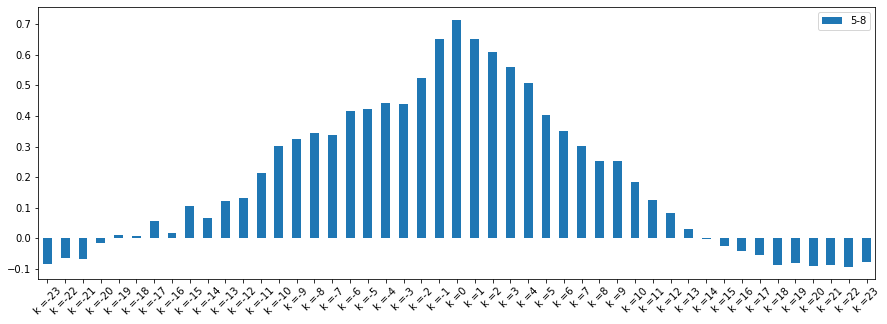

In [14]:
def plotAndSaveChart(list):
  fig = list.plot.bar(stacked=True, rot=45, figsize=(15,5))
  figure = fig.get_figure()
  
  figure.savefig('ks'+str(firstColumn)+"-"+str(secondColumn)+'.png')

plotAndSaveChart(lista58)